In [17]:
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from matplotlib import pyplot as plt

In [40]:
pokemons = pd.read_csv('Pokemon.csv')

In [41]:
pokemons.head()
pokemons.shape

(800, 13)

In [12]:
pokemons.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [13]:
pokemons.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [19]:
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [15]:
#Displaying the columns in dataset
numerical_columns = pokemons.select_dtypes(include=["int64", "float64"]).columns
print("Numerical Columns:")
print(numerical_columns)

categorical_columns = pokemons.select_dtypes(include=["object"]).columns
print("Categorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['#', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation'],
      dtype='object')
Categorical Columns:
Index(['Name', 'Type 1', 'Type 2'], dtype='object')


In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [42]:
# Удаление ненужных столбцов
pokemons = pokemons.drop(columns=['#', 'Name'])

# Обработка пропущенных значений в столбце 'Type 2'
pokemons['Type 2'].fillna('None', inplace=True)


C:\Users\jija0\AppData\Local\Temp\ipykernel_12576\776563588.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pokemons['Type 2'].fillna('None', inplace=True)


In [43]:
# Преобразование булевых значений в числовые (0 и 1)
pokemons['Legendary'] = pokemons['Legendary'].astype(int)

In [34]:
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    object
 1   Type 2      800 non-null    object
 2   Total       800 non-null    int64 
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    int32 
dtypes: int32(1), int64(8), object(2)
memory usage: 65.8+ KB


In [35]:
pokemons.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


In [44]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Кодирование категориальных переменных с использованием LabelEncoder
label_encoders = {}
categorical_columns = ['Type 1', 'Type 2']

for column in categorical_columns:
    le = LabelEncoder()
    pokemons[column] = le.fit_transform(pokemons[column])
    label_encoders[column] = le

In [46]:
# Удаление ненужных столбцов
pokemons = pokemons.drop(columns=['Attack'])


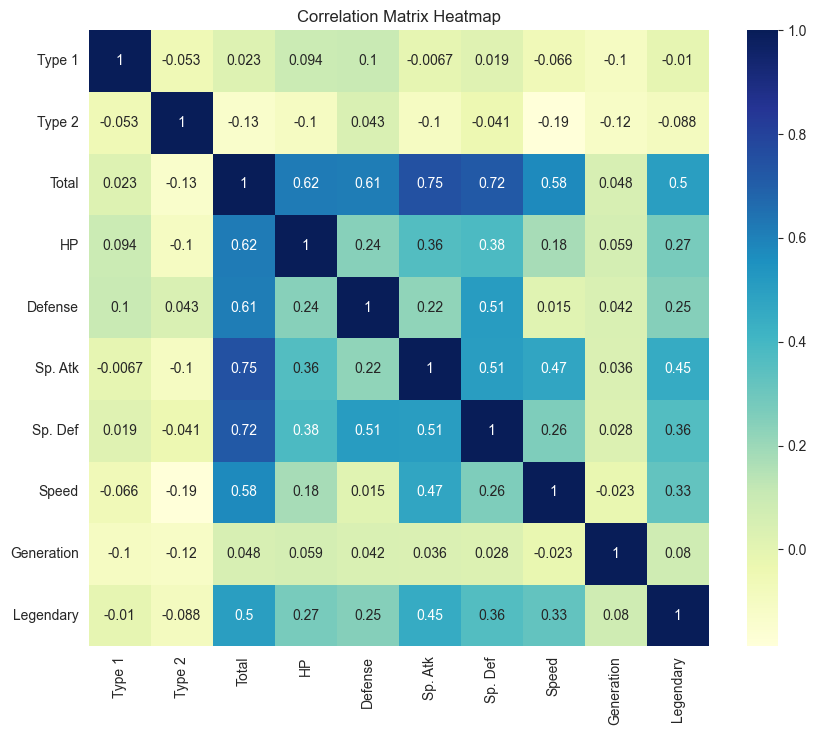

In [47]:
# Compute correlation matrix
corr_matrix = pokemons.corr(method = 'pearson')

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8)) #size
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [53]:
top_2_features = ['Total','Sp. Atk']
subset = pokemons[top_2_features]

In [68]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor

# Инициализация моделей
models = {
    'IsolationForest': IsolationForest(),
    'OneClassSVM': OneClassSVM(),
    'EllipticEnvelope': EllipticEnvelope(),
    'LocalOutlierFactor': LocalOutlierFactor(novelty=True)  # novelty=True для применения на новых данных
}

# Обучение моделей
predictions = {}
for model_name, model in models.items():
    model.fit(subset)
    predictions[model_name] = model.predict(subset)


D:\Sigmoid home_task\Outliers\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


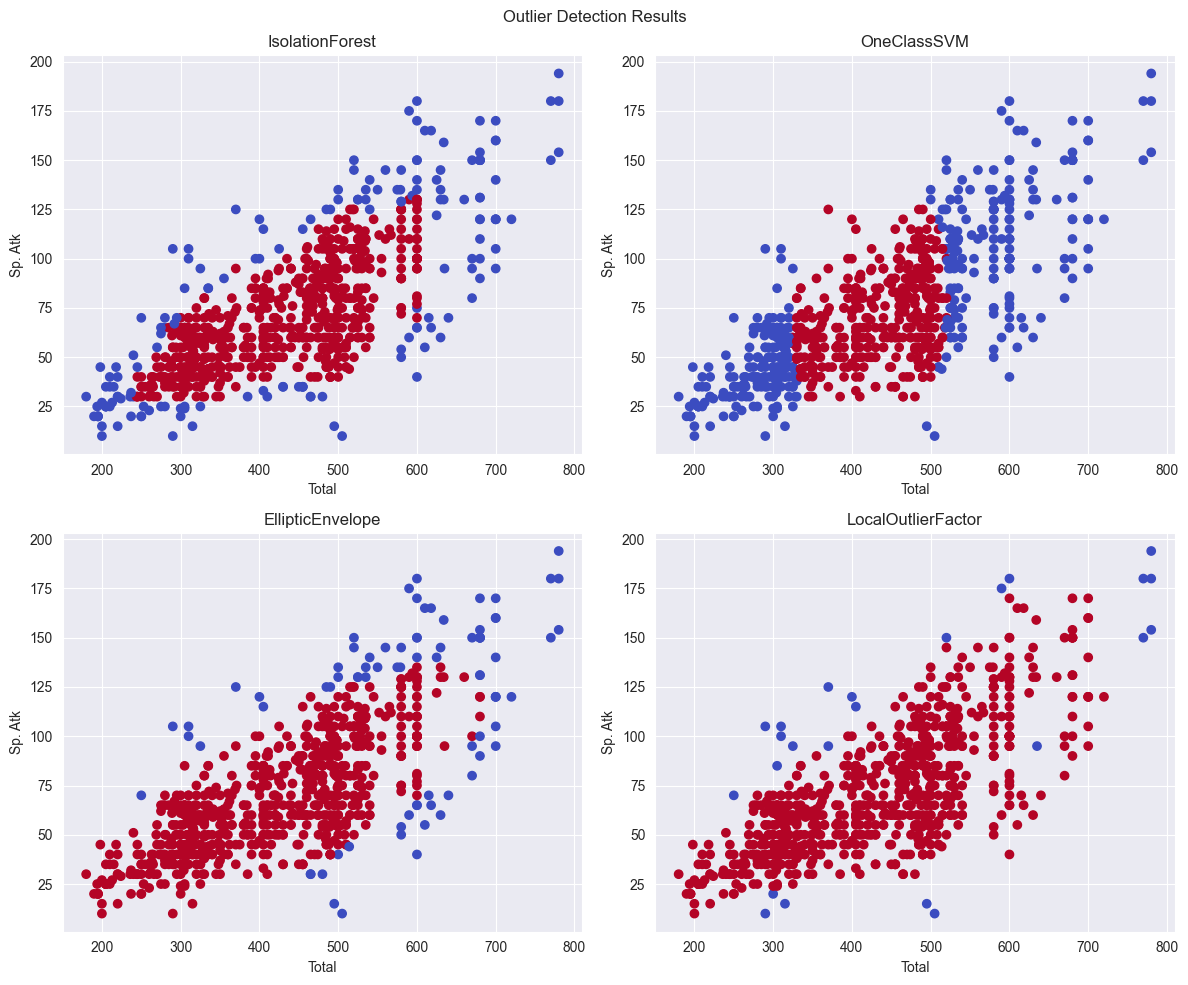

In [69]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Outlier Detection Results')

for ax, (model_name, prediction) in zip(axs.ravel(), predictions.items()):
    ax.scatter(subset.iloc[:, 0], subset.iloc[:, 1], c=prediction, cmap='coolwarm', marker='o')
    ax.set_title(model_name)
    ax.set_xlabel(top_2_features[0])
    ax.set_ylabel(top_2_features[1])

plt.tight_layout()
plt.show()


In [74]:
from sklearn.model_selection import train_test_split
X = pokemons.drop(columns=['Legendary'])
y = pokemons['Legendary']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:

# Обучение и удаление выбросов
cleaned_datasets = {}

for model_name, model in models.items():
    if model_name == 'LocalOutlierFactor':
        model.fit(X_train)
        y_pred_train = model.predict(X_train)
    else:
        model.fit(X_train)
        y_pred_train = model.predict(X_train)

    mask = y_pred_train != -1
    cleaned_X_train = X_train[mask]
    cleaned_y_train = y_train[mask]
    cleaned_datasets[model_name] = (cleaned_X_train, cleaned_y_train)

D:\Sigmoid home_task\Outliers\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Инициализация моделей регрессии
regressors = {
    'LinearRegression': LinearRegression(),
    'KNNRegressor': KNeighborsRegressor()
}


results = []

# Обучение и оценка на исходном наборе данных
for reg_name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Algorithm': reg_name, 'Outlier Detection': 'None', 'MSE': mse, 'R2': r2})

# Обучение и оценка на очищенных наборах данных
for model_name, (cleaned_X_train, cleaned_y_train) in cleaned_datasets.items():
    for reg_name, reg in regressors.items():
        reg.fit(cleaned_X_train, cleaned_y_train)
        y_pred = reg.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append({'Algorithm': reg_name, 'Outlier Detection': model_name, 'MSE': mse, 'R2': r2})


results_df = pd.DataFrame(results)

# Печать результатов
print(results_df)


          Algorithm   Outlier Detection       MSE        R2
0  LinearRegression                None  0.048882  0.165755
1      KNNRegressor                None  0.031167  0.468089
2  LinearRegression     IsolationForest  0.045760  0.219031
3      KNNRegressor     IsolationForest  0.042667  0.271822
4  LinearRegression         OneClassSVM  0.062500 -0.066667
5      KNNRegressor         OneClassSVM  0.062500 -0.066667
6  LinearRegression    EllipticEnvelope  0.049798  0.150107
7      KNNRegressor    EllipticEnvelope  0.030167  0.485156
8  LinearRegression  LocalOutlierFactor  0.049766  0.150654
9      KNNRegressor  LocalOutlierFactor  0.031667  0.459556


KNNRegressor показывает лучшие результаты на исходных данных по сравнению с LinearRegression.
OneClassSVM показал наихудшие результаты для удаления выбросов, значительно ухудшив качество моделей.
EllipticEnvelope и IsolationForest могут улучшить или сохранить качество моделей в зависимости от ситуации.
LocalOutlierFactor не дал значительных улучшений по сравнению с исходными данными.

